# Práctica 3. Procesamiento de imágenes


1. El negativo de una imagen es el resultado de aplicar la siguiente operación: 255-imagen(i,j). Aplica esta operación sobre la `imagen2.png` y, posteriormente, crea un video que vaya mezclando las dos imágenes por columnas, de forma que aparezca primero el negativo de la imagen y vaya apareciendo poco a poco la imagen original. El número de iteraciones debe ser igual al ancho de la imagen y en cada una se debe ir desplazando una columna a la derecha la imagen original sobre el negativo. Guarda el vídeo con el nombre `vídeo2.mp4`. (1.0 puntos)

In [ ]:
import cv2 as cv
import os

os.makedirs("output", exist_ok=True)

imagen = cv.imread('images/imagen2.png')
if imagen is None:
    raise FileNotFoundError("No se encontró 'imagen2.png'.")

negativo = 255 - imagen
alto, ancho, canales = imagen.shape

fps = 30
fourcc = cv.VideoWriter_fourcc(*'mp4v') # Codec para .mp4
out = cv.VideoWriter('output/video2.mp4', fourcc, fps, (ancho, alto))

for i in range(ancho + 1):
    frame = negativo.copy()
    frame[:, :i] = imagen[:, :i] # Reemplaza la parte izquierda (negativa) con la imagen original
    out.write(frame)

out.release()
cv.destroyAllWindows()

print("Vídeo 'video2.mp4' creado correctamente.")


Vídeo 'video2.mp4' creado correctamente.


2. Desarrolla una pequeña aplicación que mediante trackbars permita hacer transformaciones en el rango dinámico (logarítmica y exponencial) seleccionando la intensidad de la compresión/expansión. Selecciona dos imágenes donde el efecto de ambas transformaciones se perciba claramente. (1.0 punto)

In [ ]:
import cv2 as cv
import numpy as np
import os

os.makedirs("output", exist_ok=True)

# Transformaciones
def log_transform(img, c):
    img_f = img.astype(np.float32) / 255.0
    out = np.log1p(c * img_f) # mejora zonas oscuras
    out = cv.normalize(out, None, 0, 255, cv.NORM_MINMAX)
    return out.astype(np.uint8)

def exp_transform(img, c):
    img_f = img.astype(np.float32) / 255.0
    out = np.expm1(c * img_f)
    out = cv.normalize(out, None, 0, 255, cv.NORM_MINMAX)
    return out.astype(np.uint8)

# Callback de las trackbars
def update():
    c_log = max(0.1, cv.getTrackbarPos('Intensidad Log', 'Transformaciones') / 10.0)
    c_exp = max(0.1, cv.getTrackbarPos('Intensidad Exp', 'Transformaciones') / 10.0)

    out_log = log_transform(img_log, c_log)
    out_exp = exp_transform(img_exp, c_exp)

    fila1 = np.hstack((img_log, out_log))
    fila2 = np.hstack((img_exp, out_exp))
    vista = np.vstack((fila1, fila2))

    cv.putText(vista, f'LOG c={c_log:.1f}', (10, 30), cv.FONT_HERSHEY_SIMPLEX, 0.8, (0,255,0), 2)
    cv.putText(vista, f'EXP c={c_exp:.1f}', (10, fila1.shape[0] + 30), cv.FONT_HERSHEY_SIMPLEX, 0.8, (0,255,0), 2)

    cv.imshow('Transformaciones', vista)

# Cargar imágenes
img_log = cv.imread('images/imagen7_1.jpg', cv.IMREAD_COLOR)
img_exp = cv.imread('images/imagen7_2.png', cv.IMREAD_COLOR)
if img_log is None or img_exp is None:
    raise FileNotFoundError("No se pudieron cargar las imágenes.")

# Redimensionar
if img_log.shape[:2] != img_exp.shape[:2]:
    h = min(img_log.shape[0], img_exp.shape[0])
    w = min(img_log.shape[1], img_exp.shape[1])
    img_log = cv.resize(img_log, (w, h))
    img_exp = cv.resize(img_exp, (w, h))

cv.namedWindow('Transformaciones')

cv.createTrackbar('Intensidad Log', 'Transformaciones', 10, 100, lambda x: None)
cv.createTrackbar('Intensidad Exp', 'Transformaciones', 10, 100, lambda x: None)

update()

print("Ajusta 'Intensidad Log' y 'Intensidad Exp'. Pulsa ESC para salir.")

while True:
    key = cv.waitKey(1) & 0xFF
    if key == 27:
        break
    update()

cv.destroyAllWindows()


Ajusta 'Intensidad Log' y 'Intensidad Exp'. Pulsa ESC para salir.


3. Mezcla las imágenes `imagen7_1.jpg` e `imagen7_2.png` de forma no lineal utilizando la siguiente expresión:

$$
I_3 = \frac{1 + \cos\left(\frac{\alpha}{180}\pi\right)}{2} I_1 + \frac{1 - \cos\left(\frac{\alpha}{180}\pi\right)}{2} I_2
$$ 

   Crea un vídeo de 360 frames aumentando el ángulo en 1° en cada iteración y guárdalo con el nombre de `video7.mp4`. (1.0 punto)


In [ ]:
import cv2
import numpy as np
import os

os.makedirs("output", exist_ok=True)

img1 = cv2.imread('images/imagen7_1.jpg')
img2 = cv2.imread('images/imagen7_2.png')

if img1 is None or img2 is None:
    raise FileNotFoundError("No se encontró 'imagen7_1.jpg' o 'imagen7_2.png'")

img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

I1 = img1.astype(np.float32)
I2 = img2.astype(np.float32)

fps = 30
output_name = 'output/video7.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video = cv2.VideoWriter(output_name, fourcc, fps, (I1.shape[1], I1.shape[0]))

for alpha in range(360):
    cos_term = np.cos((alpha / 180) * np.pi)
    w1 = (1 + cos_term) / 2
    w2 = (1 - cos_term) / 2

    I3 = w1 * I1 + w2 * I2 # Mezcla ponderada

    frame = np.uint8(np.clip(I3, 0, 255)) # imagen en valores [0, 255]

    video.write(frame)

video.release()
cv2.destroyAllWindows()
print("Vídeo generado correctamente como 'video7.mp4'")


Vídeo generado correctamente como 'video7.mp4'


4. Obtén el ecualizado del histograma de la imagen `imagen3.png`. (0.5 puntos).

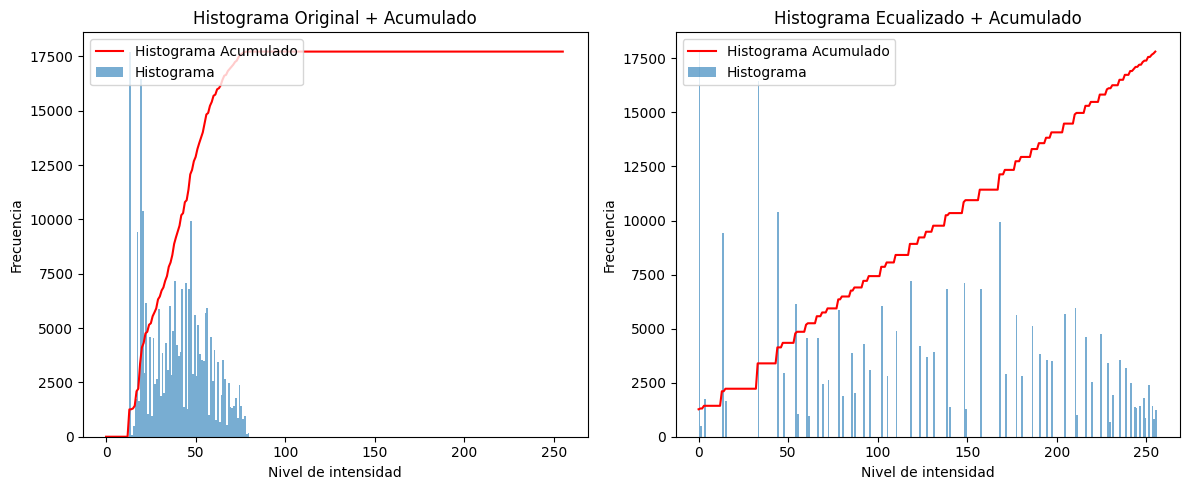

Imagen ecualizada guardada como 'output/imagen3_ecualizada.png'


In [ ]:
import cv2
from matplotlib import pyplot as plt
import os

os.makedirs("output", exist_ok=True)

img = cv2.imread('images/imagen3.png', cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError("No se encontró 'images/imagen3.png'")

ecualizada = cv2.equalizeHist(img)

cv2.imshow('Original', img)
cv2.imshow('Ecualizada', ecualizada)

hist_orig = cv2.calcHist([img], [0], None, [256], [0,256]).ravel()
hist_ecua = cv2.calcHist([ecualizada], [0], None, [256], [0,256]).ravel()

cumsum_orig = hist_orig.cumsum()
cumsum_ecua = hist_ecua.cumsum()

cumsum_orig_norm = cumsum_orig * hist_orig.max() / cumsum_orig.max()
cumsum_ecua_norm = cumsum_ecua * hist_ecua.max() / cumsum_ecua.max()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(cumsum_orig_norm, color='r', label='Histograma Acumulado')
plt.hist(img.ravel(), 256, [0,256], alpha=0.6, label='Histograma')
plt.title('Histograma Original + Acumulado')
plt.xlabel('Nivel de intensidad')
plt.ylabel('Frecuencia')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(cumsum_ecua_norm, color='r', label='Histograma Acumulado')
plt.hist(ecualizada.ravel(), 256, [0,256], alpha=0.6, label='Histograma')
plt.title('Histograma Ecualizado + Acumulado')
plt.xlabel('Nivel de intensidad')
plt.ylabel('Frecuencia')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

cv2.imwrite('output/imagen3_ecualizada.png', ecualizada)

cv2.waitKey(0)
cv2.destroyAllWindows()
print("Imagen ecualizada guardada como 'output/imagen3_ecualizada.png'")


5. Elimina el ruido de la imagen resultado del paso 4 utilizando un filtro bilateral con un diámetro d=10 y valores de sigma de 11 y 11. Guarda el resultado como `imagen3_salida.png`. (0.5 puntos)

In [ ]:
import cv2
import os

os.makedirs("output", exist_ok=True)

img_eq = cv2.imread('output/imagen3_ecualizada.png', cv2.IMREAD_GRAYSCALE)
if img_eq is None:
    raise FileNotFoundError("No se encontró 'imagen3_ecualizada.png'. Asegúrate de ejecutar antes el ejercicio 4.")

img_filtrada = cv2.bilateralFilter(img_eq, d=10, sigmaColor=11, sigmaSpace=11)

cv2.imshow('Ecualizada (Entrada)', img_eq)
cv2.imshow('Filtrada (Salida)', img_filtrada)

cv2.imwrite('output/imagen3_salida.png', img_filtrada)

cv2.waitKey(0)
cv2.destroyAllWindows()
print("Imagen filtrada guardada como 'imagen3_salida.png'")


Imagen filtrada guardada como 'imagen3_salida.png'


Como el cambio entre la imagen original y la filtrada es casi imperceptible, procedemos a aumentar los valores de sigma a 50 y 50. El resultado se guardará como `imagen3_salida_sigma50.png`.

In [ ]:
import cv2
import os

os.makedirs("output", exist_ok=True)

img_eq = cv2.imread('output/imagen3_ecualizada.png', cv2.IMREAD_GRAYSCALE)
if img_eq is None:
    raise FileNotFoundError("No se encontró 'imagen3_ecualizada.png'. Asegúrate de ejecutar antes el ejercicio 4.")

img_filtrada = cv2.bilateralFilter(img_eq, d=10, sigmaColor=50, sigmaSpace=50)

cv2.imshow('Ecualizada (Entrada)', img_eq)
cv2.imshow('Filtrada (Salida)', img_filtrada)

cv2.imwrite('output/imagen3_salida_sigma50.png', img_filtrada)

cv2.waitKey(0)
cv2.destroyAllWindows()
print("Imagen filtrada guardada como 'imagen3_salida_sigma50.png'")


Imagen filtrada guardada como 'imagen3_salida_sigma50.png'


6. Calcula la norma del gradiente de la `imagen5.jpg` utilizando los operadores de Sobel. Umbraliza los valores de la norma de forma que los valores mayores o iguales a 128 se igualen a 255 y los menores de 128 se igualen a 0. Finalmente, aplica un filtro Gaussiano de radio (7,7) con sigma=-1. Guarda el resultado con el nombre `imagen5_salida.png`. (1.5 puntos)

In [ ]:
import cv2
import numpy as np
import os

os.makedirs("output", exist_ok=True)

img = cv2.imread('images/imagen5.png', cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError("No se encontró 'imagen5.jpg'")

grad_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

norma = np.sqrt(grad_x**2 + grad_y**2)

norma = cv2.normalize(norma, None, 0, 255, cv2.NORM_MINMAX)
norma = np.uint8(norma)

_, umbralizada = cv2.threshold(norma, 128, 255, cv2.THRESH_BINARY) # >=128 -> 255; <128 -> 0

suavizada = cv2.GaussianBlur(umbralizada, (7, 7), sigmaX=-1)

cv2.imshow('Original', img)
cv2.imshow('Norma del Gradiente', norma)
cv2.imshow('Umbralizada', umbralizada)
cv2.imshow('Suavizada Final', suavizada)

cv2.imwrite('output/imagen5_salida.png', suavizada)

cv2.waitKey(0)
cv2.destroyAllWindows()

print("Resultado guardado como 'imagen5_salida.png'")


Resultado guardado como 'imagen5_salida.png'


7. Con la `imagen4.jpg`, crea un vídeo de 100 frames aplicando un filtro mediano de radio (ksize) igual a 7. Aplica el filtro en cada iteración al resultado de la iteración anterior. Guarda el vídeo con el nombre `video4.mp4`. (0.5 puntos)

In [ ]:
import cv2
import numpy as np
import os

os.makedirs("output", exist_ok=True)

img = cv2.imread('images/imagen4.jpg')
if img is None:
    raise FileNotFoundError("No se encontró 'imagen4.jpg'")

fps = 20
nombre_video = 'output/video4.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
alto, ancho, canales = img.shape
video = cv2.VideoWriter(nombre_video, fourcc, fps, (ancho, alto))

frame_actual = img.copy()

for i in range(100):
    frame_actual = cv2.medianBlur(frame_actual, ksize=7)
    
    video.write(frame_actual)

video.release()
cv2.destroyAllWindows()
print("Vídeo guardado correctamente como 'video4.mp4'")


Vídeo guardado correctamente como 'video4.mp4'


8. Elimina el ruido de la `imagen6.png` aplicando todos los algoritmos vistos en clase para este fin. Si es necesario aplica los filtros múltiples veces para eliminar el ruido lo mejor posible. Haz un breve estudio comparativo entre las técnicas y selecciona el mejor resultado. (1 punto) NO MEZCLAR FILTROS

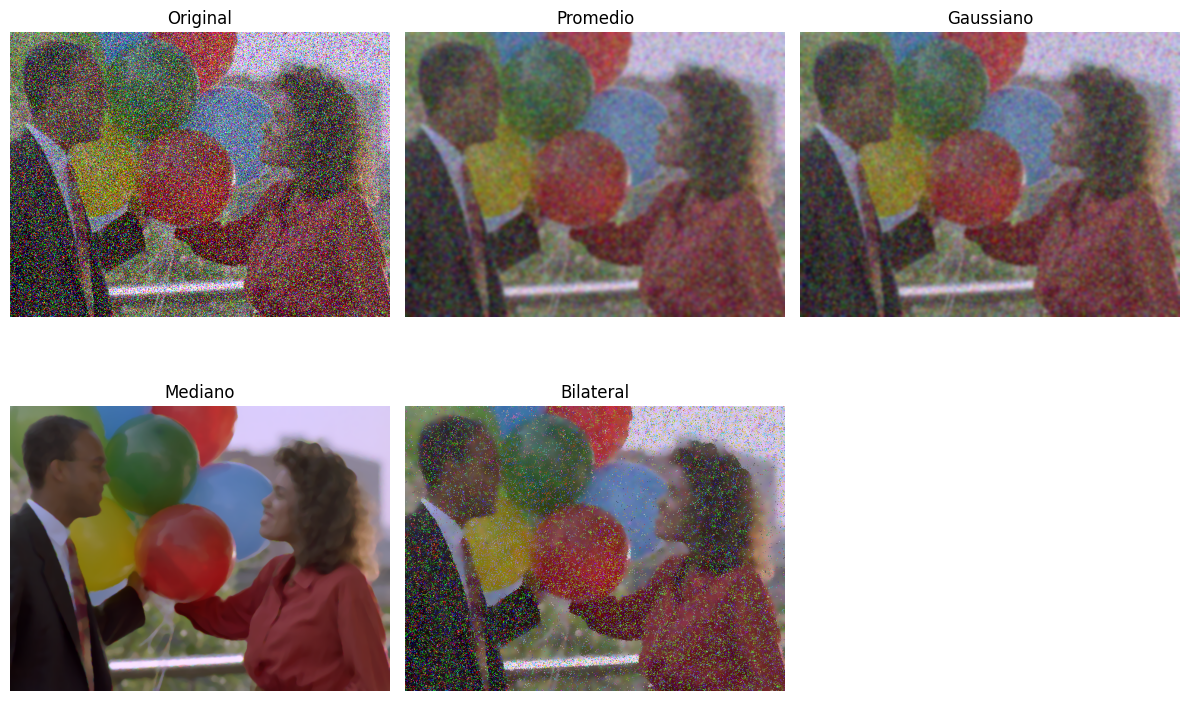

Imágenes filtradas guardadas: promedio, gaussiano, mediano y bilateral


In [ ]:
import cv2
from matplotlib import pyplot as plt
import os

os.makedirs("output", exist_ok=True)

img = cv2.imread('images/imagen6.png')
if img is None:
    raise FileNotFoundError("No se encontró 'imagen6.png'")


blur = img.copy()
for _ in range(3):
    blur = cv2.blur(blur, (5, 5))

gauss = img.copy()
for _ in range(5):
    gauss = cv2.GaussianBlur(gauss, (5, 5), sigmaX=0)

median = img.copy()
for _ in range(5):
    median = cv2.medianBlur(median, 5)

bilateral = img.copy()
for _ in range(5):
    bilateral = cv2.bilateralFilter(bilateral, d=9, sigmaColor=75, sigmaSpace=75)

titles = ['Original', 'Promedio', 'Gaussiano', 'Mediano', 'Bilateral']
images = [img, blur, gauss, median, bilateral]

plt.figure(figsize=(12, 8))
for i in range(5):
    plt.subplot(2, 3, i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

cv2.imwrite('output/imagen6_promedio.png', blur)
cv2.imwrite('output/imagen6_gaussiano.png', gauss)
cv2.imwrite('output/imagen6_mediano.png', median)
cv2.imwrite('output/imagen6_bilateral.png', bilateral)

print("Imágenes filtradas guardadas: promedio, gaussiano, mediano y bilateral")


9. Investiga sobre alguna técnica de filtrado distinta a las vistas en clase. Explícala y codifica un ejemplo de uso. A continuación, propón dos filtros de tu invención (lineales o no lineales) especializados en detectar bordes o eliminar ruido. (1 punto)

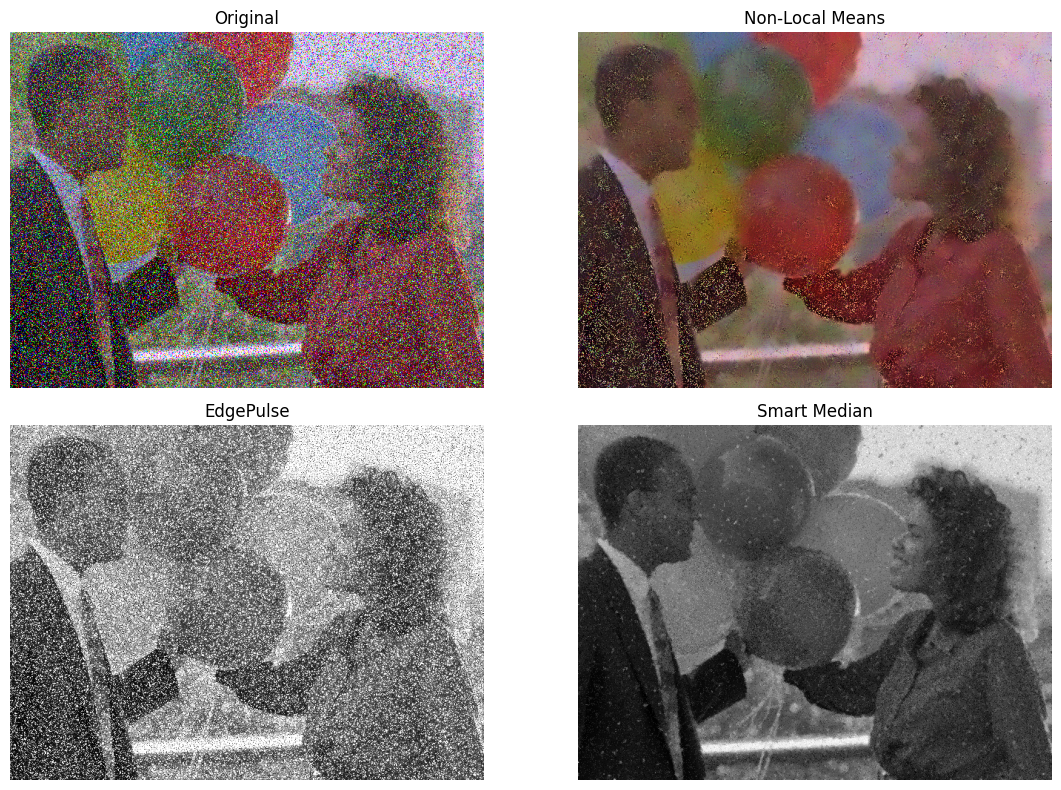

Imágenes guardadas: NLM, EdgePulse y SmartMedian


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

os.makedirs("output", exist_ok=True)

# FILTRO NUEVO INVESTIGADO: NON-LOCAL MEANS (NLM)
def filtro_nlm(img):
    """
    Aplica el filtro Non-Local Means Denoising (elimina ruido preservando bordes).
    """
    return cv2.fastNlMeansDenoisingColored(
        img, None,
        h=30,            # intensidad luminancia
        hColor=30,       # intensidad crominancia
        templateWindowSize=7,
        searchWindowSize=21
    )

# FILTRO INVENTADO 1: "EDGEPULSE"
def filtro_edgepulse(img):
    """
    Aumenta la intensidad de los bordes amplificando los gradientes locales.
    """
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gx = cv2.Sobel(gray, cv2.CV_32F, 1, 0, ksize=3)
    gy = cv2.Sobel(gray, cv2.CV_32F, 0, 1, ksize=3)
    grad = cv2.magnitude(gx, gy)

    factor = 1 + (grad / grad.max()) * 2.0
    enhanced = np.clip(gray * factor, 0, 255).astype(np.uint8)
    return enhanced

# FILTRO INVENTADO 2: "SMART MEDIAN"
def filtro_smart_median(img):
    """
    Sustituye solo los píxeles ruidosos (que difieren mucho del entorno)
    por el resultado del filtro mediano, manteniendo los detalles nítidos.
    """
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    median = cv2.medianBlur(gray, 5)
    diff = cv2.absdiff(gray, median)
    mask = diff > 40 # umbral para detectar ruido
    result = gray.copy()
    result[mask] = median[mask]
    return result

def main():
    img = cv2.imread('images/imagen6.png')
    if img is None:
        raise FileNotFoundError("No se encontró 'imagen6.png'")

    nlm = filtro_nlm(img)
    edgepulse = filtro_edgepulse(img)
    smart_median = filtro_smart_median(img)

    # Mostrar resultados
    titles = ['Original', 'Non-Local Means', 'EdgePulse', 'Smart Median']
    images = [img, nlm, edgepulse, smart_median]

    plt.figure(figsize=(12, 8))
    for i in range(4):
        plt.subplot(2, 2, i+1)
        if len(images[i].shape) == 2:
            plt.imshow(images[i], cmap='gray')
        else:
            plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        plt.title(titles[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

    # Guardar resultados
    cv2.imwrite('output/imagen6_nlm.png', nlm)
    cv2.imwrite('output/imagen6_edgepulse.png', edgepulse)
    cv2.imwrite('output/imagen6_smartmedian.png', smart_median)
    print("Imágenes guardadas: NLM, EdgePulse y SmartMedian")

if __name__ == "__main__":
    main()


Resumen explicativo para tu entrega

1. Técnica investigada:
El Non-Local Means Denoising (NLM) es un filtro avanzado que elimina ruido comparando parches similares dentro de toda la imagen, no solo con sus vecinos inmediatos. Su ventaja es que preserva bordes y texturas mejor que los filtros promedio o gaussianos.

2. Filtro inventado – “EdgePulse”
Basado en el gradiente de Sobel, este filtro realza los bordes multiplicando la intensidad local por un factor proporcional a la magnitud del gradiente. El resultado es una imagen con bordes reforzados sin binarización.

3. Filtro inventado – “SmartMedian”
Aplica un filtro mediano solo en zonas ruidosas detectadas por una diferencia local significativa. Así, mantiene el detalle en zonas limpias mientras suaviza el ruido en las demás.

Tres enfoques complementarios:

NLM → elimina ruido preservando bordes.

EdgePulse → resalta contornos de forma adaptativa.

SmartMedian → reduce ruido selectivamente sin pérdida de detalle.